In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from scipy.stats import friedmanchisquare, wilcoxon, kruskal, mannwhitneyu, shapiro, levene
from matplotlib.colors import ListedColormap

## Datos

In [28]:
# Datos (matriz con resultados)
results = np.array([
    [25, 32, 35, 42, 35, 42, 21],
    [23, 31, 46, 21, 36, 32, 43],
    [24, 32, 54, 23, 25, 45, 45],
    [32, 34, 32, 51, 20, 50, 43],
    [32, 29, 41, 31, 23, 51, 41],
    [34, 22, 42, 30, 26, 48, 43],
    [21, 34, 39, 34, 29, 43, 54],
    [24, 35, 36, 25, 29, 44, 53],
    [27, 31, 32, 35, 21, 47, 51],
    [20, 31, 37, 29, 21, 49, 54],
])

# Convertir datos a un DataFrame
data = pd.DataFrame(results, columns=["P1", "P2", "P3", "P4", "P5", "P6", "P7"])

results_transposed = results.T  # Transponer los resultados para que cada columna sea un conjunto de parámetros (P1, P2,...)

# Cálculo de normalidad

## Visualización normalidad

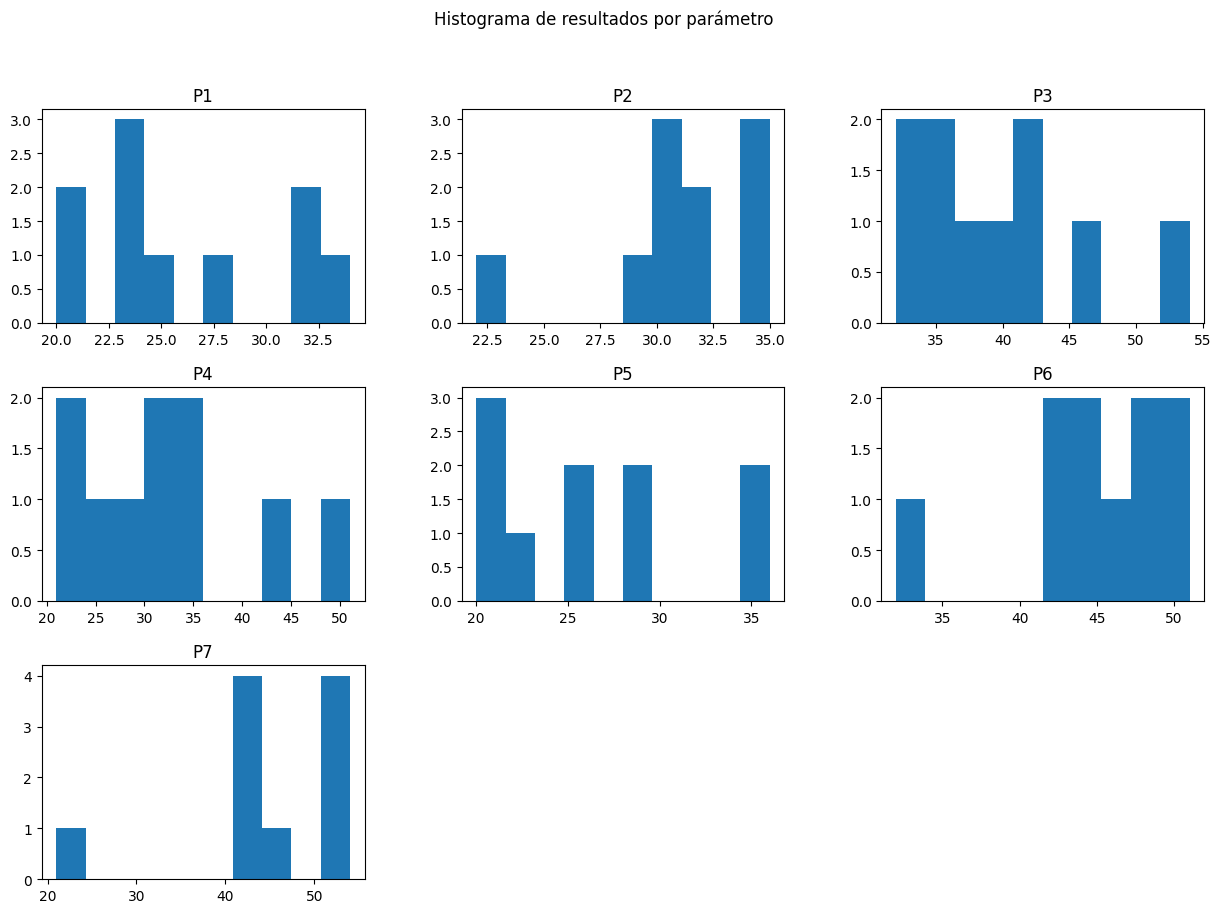

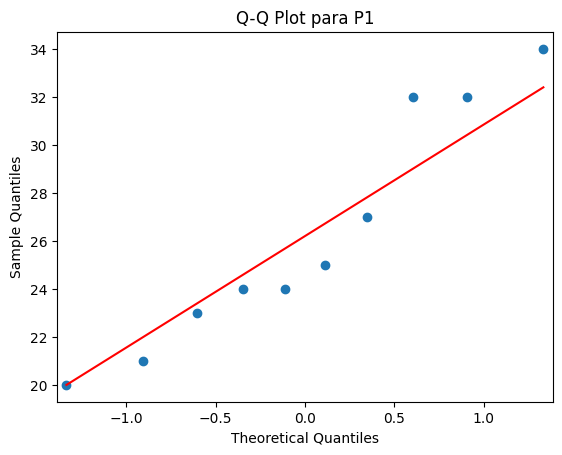

P1 - Estadístico de Shapiro-Wilk: 0.9075692283600741, p-valor: 0.26470805679083076
P1: Podría seguir una distribución normal


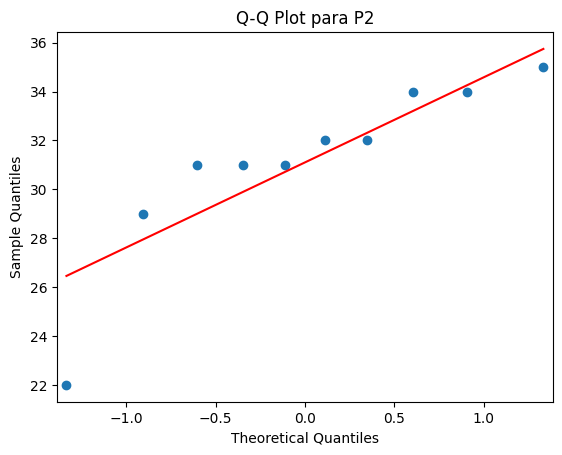

P2 - Estadístico de Shapiro-Wilk: 0.8121557060510673, p-valor: 0.020364302301902584
P2: No sigue una distribución normal


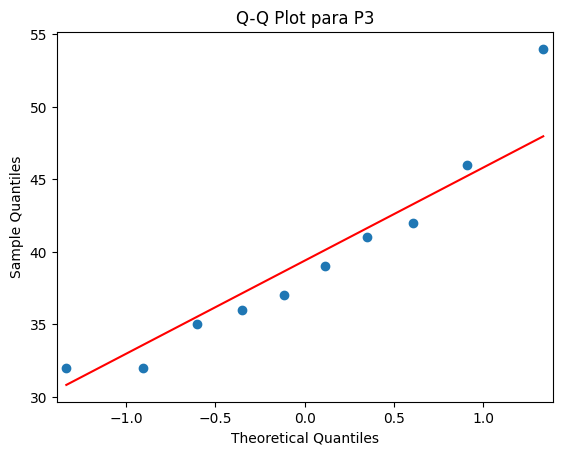

P3 - Estadístico de Shapiro-Wilk: 0.9146686227187142, p-valor: 0.3146229109559936
P3: Podría seguir una distribución normal


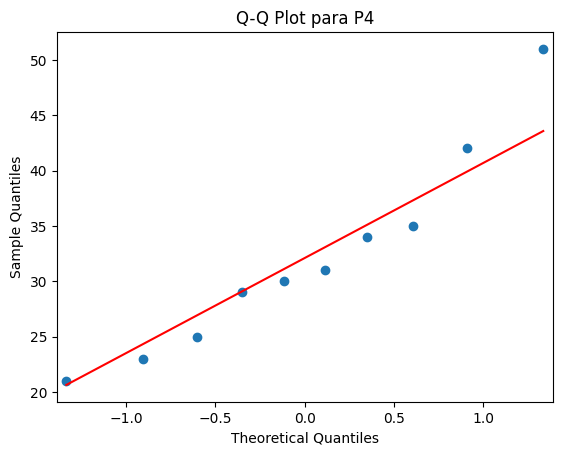

P4 - Estadístico de Shapiro-Wilk: 0.9332200617564734, p-valor: 0.4803013484530977
P4: Podría seguir una distribución normal


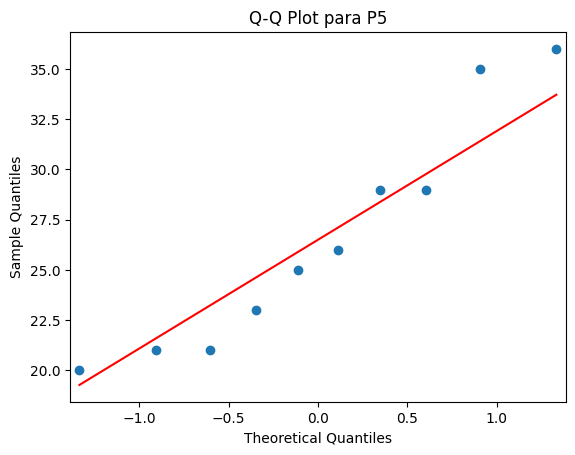

P5 - Estadístico de Shapiro-Wilk: 0.9057402665349324, p-valor: 0.252993339283059
P5: Podría seguir una distribución normal


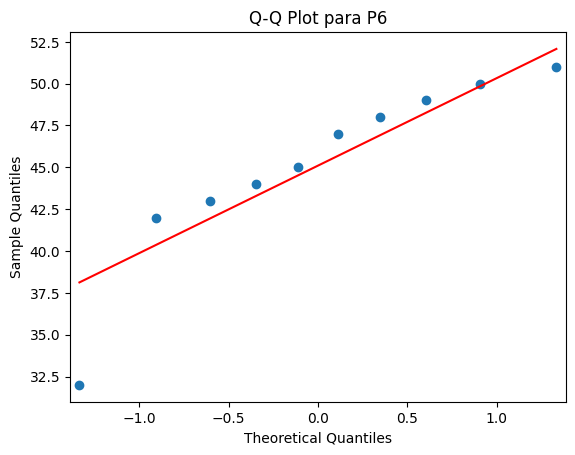

P6 - Estadístico de Shapiro-Wilk: 0.8678825157001302, p-valor: 0.09443510834212329
P6: Podría seguir una distribución normal


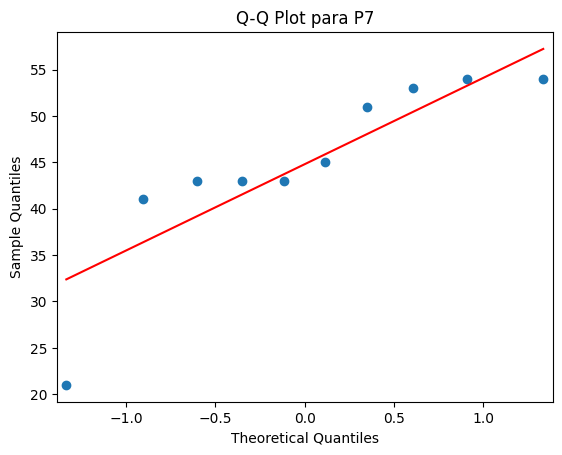

P7 - Estadístico de Shapiro-Wilk: 0.8061023394902113, p-valor: 0.01719658796364268
P7: No sigue una distribución normal


In [4]:

# Histograma para cada parámetro
data.hist(bins=10, figsize=(15, 10), grid=False)
plt.suptitle("Histograma de resultados por parámetro")
plt.show()

dict_table = {}
# Gráfico Q-Q y Prueba de Shapiro-Wilk para cada parámetro
for col in data.columns:
    # Gráfico Q-Q
    sm.qqplot(data[col], line='s')
    plt.title(f"Q-Q Plot para {col}")
    plt.show()

    # Prueba de Shapiro-Wilk
    stat, p_value = shapiro(data[col])
    print(f"{col} - Estadístico de Shapiro-Wilk: {stat}, p-valor: {p_value}")
    if p_value > 0.05:
        print(f"{col}: Podría seguir una distribución normal")
        normal = True
    else:
        print(f"{col}: No sigue una distribución normal")
        normal = False

    dict_table[col] = [stat, p_value, normal]

## Tabla normalidad

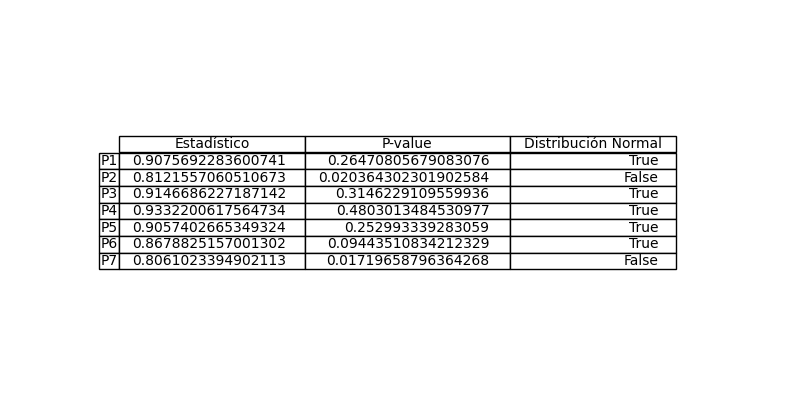

In [27]:
# Crear un DataFrame de pandas
columns = ['Estadístico', 'P-value', 'Distribución Normal']
df = pd.DataFrame.from_dict(dict_table, orient='index', columns=columns)

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 5))  # Tamaño de la figura
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=columns, rowLabels=df.index, loc='center')

# Ajustar formato de la tabla
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(columns))))

plt.show()

# Cálculo de Homocedasticidad

## Prueba Levene

In [29]:
stat, p_value = levene(*results.T)
print(f"Estadístico de Levene: {stat}, p-valor: {p_value}")
if p_value > 0.05:
    print("Se cumple homocedasticidad")
else:
    print("No se cumple homocedasticidad")


Estadístico de Levene: 1.095364238410596, p-valor: 0.3750952002485063
Se cumple homocedasticidad


## Visualización Homocedasticidad

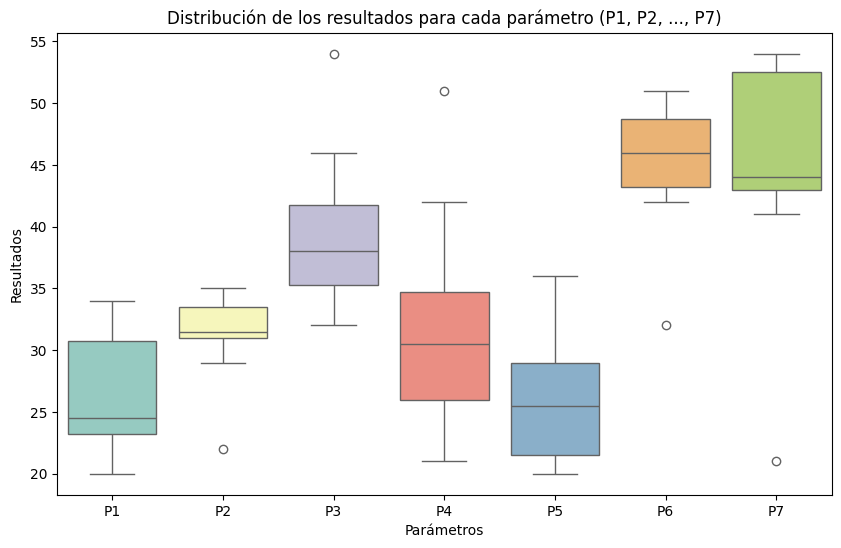

In [30]:
# Visualización con boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=results, palette="Set3")
plt.title("Distribución de los resultados para cada parámetro (P1, P2, ..., P7)")
plt.xlabel("Parámetros")
plt.ylabel("Resultados")
plt.xticks(ticks=np.arange(7), labels=["P1", "P2", "P3", "P4", "P5", "P6", "P7"])
plt.show()

# Diferencias significativas

## Escenario 1 (misma semilla)

### Prueba Friedman

In [ ]:
# Prueba de Friedman
stat, p_value = friedmanchisquare(*results_transposed)
print(f"Estadístico de Friedman: {stat}, p-valor: {p_value}")

# Si el p-valor es menor que 0.05, existen diferencias significativas
if p_value < 0.05:
    print("Existen diferencias significativas entre los parámetros.")
else:
    print("No se encuentran diferencias significativas entre los parámetros.")

Estadístico de Friedman: 32.03610108303247, p-valor: 1.605963392835356e-05
Existen diferencias significativas entre los parámetros.


### Prueba Wilcoxon (comparación pares)

In [ ]:
# Comparación de pares usando Wilcoxon si encontramos diferencias significativas
len_matrix = len(results_transposed)
wilcoxon_result= {}

for par1 in range(len_matrix):
    for par2 in range(par1+1, len_matrix):
        stat, p_value = wilcoxon(results_transposed[par1], results_transposed[par2])

        print(f"Resultados comparación P{par1+1} vs P{par2+1} - Estadístico: {stat}, p-valor: {p_value}")
        if p_value < 0.05:
            print(f"Si hay diferencia significativa entre P{par1+1} y P{par2+1}")
            result = True
        else:
            print(f"No hay diferencia significativa entre P{par1+1} y P{par2+1}")
            result = False

        wilcoxon_result[f"P{par1+1} vs P{par2+1}"] = [stat,p_value, result]

Resultados comparación P1 vs P2 - Estadístico: 11.0, p-valor: 0.10546875
No hay diferencia significativa entre P1 y P2
Resultados comparación P1 vs P3 - Estadístico: 0.0, p-valor: 0.007685794055213263
Si hay diferencia significativa entre P1 y P3
Resultados comparación P1 vs P4 - Estadístico: 13.0, p-valor: 0.16015625
No hay diferencia significativa entre P1 y P4
Resultados comparación P1 vs P5 - Estadístico: 25.5, p-valor: 0.845703125
No hay diferencia significativa entre P1 y P5
Resultados comparación P1 vs P6 - Estadístico: 0.0, p-valor: 0.001953125
Si hay diferencia significativa entre P1 y P6
Resultados comparación P1 vs P7 - Estadístico: 1.0, p-valor: 0.00390625
Si hay diferencia significativa entre P1 y P7
Resultados comparación P2 vs P3 - Estadístico: 3.0, p-valor: 0.009765625
Si hay diferencia significativa entre P2 y P3
Resultados comparación P2 vs P4 - Estadístico: 20.5, p-valor: 0.811892226523236
No hay diferencia significativa entre P2 y P4
Resultados comparación P2 vs P5 

In [8]:
# Crear un DataFrame de pandas
columns = ['Statistic', 'P-value', 'Result']
df = pd.DataFrame.from_dict(wilcoxon_result, orient='index', columns=columns)

# Mostrar la tabla
print(df)

          Statistic   P-value  Result
P1 vs P2       11.0  0.105469   False
P1 vs P3        0.0  0.007686    True
P1 vs P4       13.0  0.160156   False
P1 vs P5       25.5  0.845703   False
P1 vs P6        0.0  0.001953    True
P1 vs P7        1.0  0.003906    True
P2 vs P3        3.0  0.009766    True
P2 vs P4       20.5  0.811892   False
P2 vs P5        6.5  0.037109    True
P2 vs P6        0.0  0.001953    True
P2 vs P7        2.0  0.005859    True
P3 vs P4       12.0  0.130859   False
P3 vs P5        0.0  0.007579    True
P3 vs P6       13.0  0.160156   False
P3 vs P7       10.0  0.138294   False
P4 vs P5       12.5  0.160156   False
P4 vs P6        1.0  0.010793    True
P4 vs P7        7.0  0.037109    True
P5 vs P6        1.0  0.003906    True
P5 vs P7        2.0  0.005859    True
P6 vs P7       21.5  0.905530   False


### Mapa de calor (visualización pares)

C:\Users\Raul\AppData\Local\Temp\ipykernel_33560\2583767472.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sig_data = heatmap_data.applymap(lambda x: 1 if pd.notnull(x) and x < 0.05 else (0 if pd.notnull(x) else np.nan))
C:\Users\Raul\AppData\Local\Temp\ipykernel_33560\2583767472.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(sig_data, annot=sig_data.applymap(lambda x: "True" if x==1 else ("False" if x==0 else "")), fmt="", cmap=cmap_custom, cbar=False)


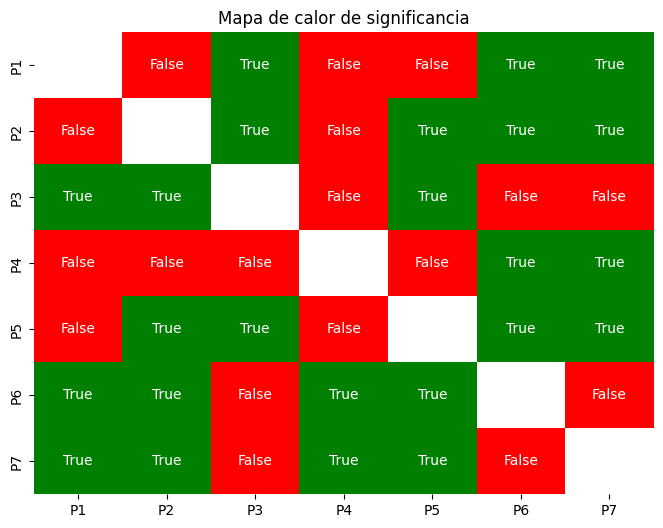

In [ ]:
#Lista de parámetros
params = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']

#Crear un DataFrame vacío (7x7) para los p-valores
heatmap_data = pd.DataFrame(np.nan, index=params, columns=params)

#Matriz con los p-valores
for key, value in wilcoxon_result.items():
    # Extraer los parámetros comparados
    left, right = key.split(" vs ")
    p_val = value[1]
    heatmap_data.loc[left, right] = p_val
    heatmap_data.loc[right, left] = p_val

#Matriz binaria: 1 si p < 0.05 
sig_data = heatmap_data.applymap(lambda x: 1 if pd.notnull(x) and x < 0.05 else (0 if pd.notnull(x) else np.nan))

#Colormap personalizado: 0 en rojo, 1 en verde
cmap_custom = ListedColormap(["red", "green"])

plt.figure(figsize=(8, 6))
sns.heatmap(sig_data, annot=sig_data.applymap(lambda x: "True" if x==1 else ("False" if x==0 else "")), fmt="", cmap=cmap_custom, cbar=False)
plt.title("Mapa de calor de significancia")
plt.show()


## Escenario 2 (diferentes semillas)

### Prueba Kruskal-Wallis 

In [ ]:
# Prueba de Kruskal-Wallis para cada parámetro (considerando semillas aleatorias)
stat, p_value = kruskal(*results_transposed)
print(f"Estadístico de Kruskal-Wallis: {stat}, p-valor: {p_value}")

# Si el p-valor es menor que 0.05, hay diferencias significativas entre los parámetros
if p_value < 0.05:
    print("Existen diferencias significativas entre los parámetros.")
else:
    print("No se encuentran diferencias significativas entre los parámetros.")



Estadístico de Kruskal-Wallis: 39.09846677426144, p-valor: 6.846432420673457e-07
Existen diferencias significativas entre los parámetros.


### Mann-Whitney U (comparación pares)

In [22]:
mannwhitneyu_result= {}
# Comparación de pares usando Wilcoxon si encontramos diferencias significativas
for par1 in range(len_matrix):
    for par2 in range(par1+1, len_matrix):
        stat, p_value = mannwhitneyu(results_transposed[par1], results_transposed[par2])
        
        print(f"Resultados comparación P{par1+1} vs P{par2+1} - Estadístico: {stat}, p-valor: {p_value}")
        if p_value < 0.05:
            print(f"Si hay diferencia significativa entre P{par1+1} y P{par2+1}")
        else:
            print(f"No hay diferencia significativa entre P{par1+1} y P{par2+1}")

        mannwhitneyu_result[f"P{par1+1} vs P{par2+1}"] = [stat,p_value, result]

Resultados comparación P1 vs P2 - Estadístico: 25.0, p-valor: 0.062125620739433916
No hay diferencia significativa entre P1 y P2
Resultados comparación P1 vs P3 - Estadístico: 4.0, p-valor: 0.0005527697927464886
Si hay diferencia significativa entre P1 y P3
Resultados comparación P1 vs P4 - Estadístico: 30.0, p-valor: 0.13956906564539745
No hay diferencia significativa entre P1 y P4
Resultados comparación P1 vs P5 - Estadístico: 48.5, p-valor: 0.9395156100435313
No hay diferencia significativa entre P1 y P5
Resultados comparación P1 vs P6 - Estadístico: 2.0, p-valor: 0.00032137577493357867
Si hay diferencia significativa entre P1 y P6
Resultados comparación P1 vs P7 - Estadístico: 8.5, p-valor: 0.001879301147410667
Si hay diferencia significativa entre P1 y P7
Resultados comparación P2 vs P3 - Estadístico: 8.5, p-valor: 0.0018200803632853985
Si hay diferencia significativa entre P2 y P3
Resultados comparación P2 vs P4 - Estadístico: 53.5, p-valor: 0.8194580612417472
No hay diferencia s

### Mapa de calor (visualización pares)

C:\Users\Raul\AppData\Local\Temp\ipykernel_33560\1833682938.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sig_data = heatmap_data.applymap(lambda x: 1 if pd.notnull(x) and x < 0.05 else (0 if pd.notnull(x) else np.nan))
C:\Users\Raul\AppData\Local\Temp\ipykernel_33560\1833682938.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(sig_data, annot=sig_data.applymap(lambda x: "True" if x==1 else ("False" if x==0 else "")), fmt="", cmap=cmap_custom, cbar=False)


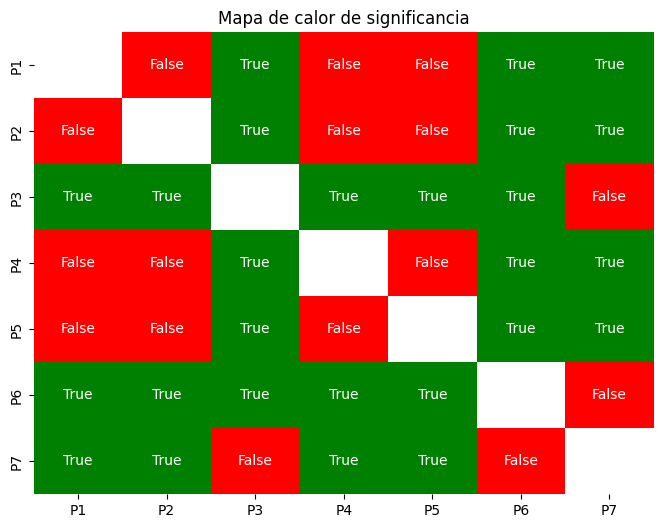

In [ ]:
#Matriz con los p-valores
for key, value in mannwhitneyu_result.items():
    # Extraer los parámetros comparados
    left, right = key.split(" vs ")
    p_val = value[1]
    heatmap_data.loc[left, right] = p_val
    heatmap_data.loc[right, left] = p_val

#Matriz binaria: 1 si p < 0.05 
sig_data = heatmap_data.applymap(lambda x: 1 if pd.notnull(x) and x < 0.05 else (0 if pd.notnull(x) else np.nan))

#Colormap personalizado: 0 en rojo, 1 en verde
cmap_custom = ListedColormap(["red", "green"])

plt.figure(figsize=(8, 6))
sns.heatmap(sig_data, annot=sig_data.applymap(lambda x: "True" if x==1 else ("False" if x==0 else "")), fmt="", cmap=cmap_custom, cbar=False)
plt.title("Mapa de calor de significancia")
plt.show()